# RESULTS GRAPHING: Aspen Column Internal Design via SAC RL

- Notebook created: 5-Dec-2024
- Authors: Dhan Lord B. Fortela, Holden Broussard, Renee Ward, Carly Broussard, Ashley P. Mikolajczyk

**Description:** This notebook accompanies as implementation platform for the workflow done in the paper titled "Soft Actor-Critic Reinforcement Learning Improves Column Internals Design Optimization for Multistage Distillation"

**SAC RL Variables:**

Soft Actor-Critic (SAC) Reinforcement Learning

- State Space: % approach to flooding in at the TOP and BOT sections of column -> 2-dim, range: 0-300%.

- Action Space: Here are the design parameters as actions in the SAC RL for TOP and BOT sections seperately

        TOP_DC_Clearance = action[0] # downcomer cleafrance, mm
        TOP_tray_spacing = action[1] # tray spacing, feet
        TOP_Weir_HT = action[2] # weir height, mm
        TOP_Hole_Diam = action[3] # sieve hole diam, mm
        TOP_WeirLengthSide = action[4] # weir side length, meters

        BOT_DC_Clearance = action[5] # downcomer cleafrance, mm
        BOT_tray_spacing = action[6] # tray spacing, feet
        BOT_Weir_HT = action[7] # weir height, mm
        BOT_Hole_Diam = action[8] # sieve hole diam, mm
        BOT_WeirLengthSide = action[9] # weir side length, meters


- Reward: Highest reward (100 pts) when % approach to flooding is within optimal range, e.g., 80-90%, while lower scores in other ranges. 


## Visualize Results of SAC RL

### Rewards

In [1]:
nfiles = 10
nrows = 500

C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\3906063774.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


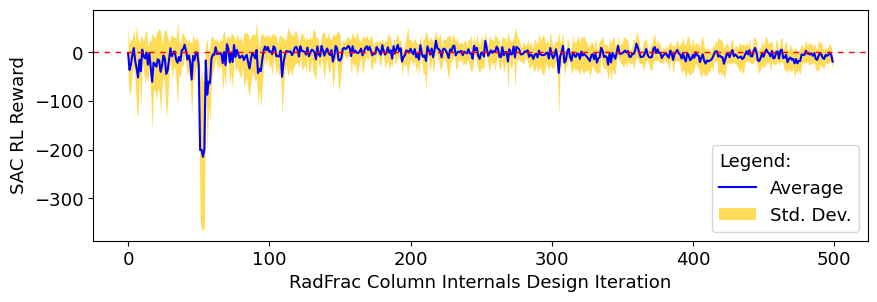

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# initialize general plotting format:
plt.rcParams['font.size'] = 13
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.style.use('seaborn-v0_8-bright')

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_rewards")
# read data from CSV files
df_all_wide = pd.concat([pd.read_csv(csv) for csv in f.glob("*.csv")], axis=1)

# Keep only the reward colimns 
df_all_wide2 = df_all_wide[['reward']]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = ['Reward_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3


############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
color='#0000FF' # for the average line
facecolor = '#FFCC11' # for the stdev
fill_alpha = 0.7

fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel('SAC RL Reward')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#0000FF', facecolor=facecolor, linewidth=0)
#ax.axhline(100, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.axhline(0, color="red", linewidth=1, dashes =  (4,4,4,4))
ax.legend(title='Legend:', alignment='left')
plt.savefig("AspenRL_plot1_results_RewardExpt1.jpg", dpi=300, bbox_inches='tight')



In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### States

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

f = Path.cwd().joinpath("outputs_states")
files = list(f.glob("*5_0.csv"))[0]


df1 = pd.read_csv(files)

# create function that splits the array of state values
def cleanCSV(df):
    # Convert String Lists to Actual Lists:
    df['state'] = df['state'].apply(eval)
    #Split the Lists into Separate Columns
    split_df = pd.DataFrame(df['state'].tolist(), index=df.index)
    split_df.columns = ['State_TOP','State_BOT']
    df = pd.concat([df,split_df], axis=1)
    df = df.drop('state', axis=1)
    return df

# try function
df_clean = cleanCSV(df1)
df_clean

,episode,State_TOP,State_BOT
0,0,70.551019,58.057464
1,1,51.512299,50.930160
2,2,90.124162,85.420707
3,3,50.122206,54.782068
4,4,88.043159,87.304819
...,...,...,...
495,495,58.205660,57.301582
496,496,67.190319,62.105153
497,497,50.308672,50.560518
498,498,50.138337,49.659821


#### TOP Section

C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\1615982824.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


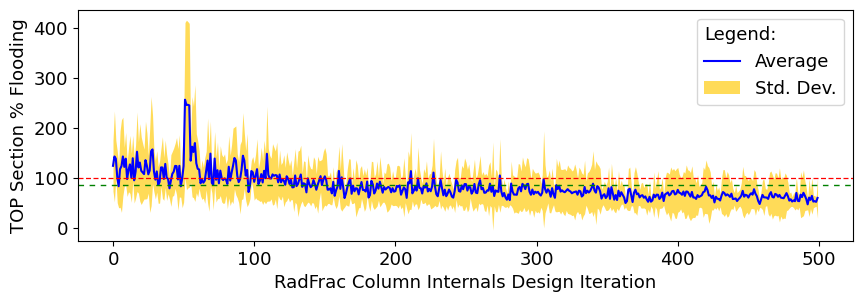

In [5]:
## TOP

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_states")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the State_TOP columns
df_all_wide2 = df_all_wide[['State_TOP']]
df_all_wide2 = df_all_wide2.iloc[:nrows,]
# assign unique column names
df_all_wide2.columns = ['State_TOP ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel('TOP Section % Flooding')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
ax.axhline(100, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.axhline(85, color="green", linewidth=1, dashes =  (4,4,4,4))
ax.legend(title='Legend:', alignment='left')
plt.savefig("AspenRL_plot1_results_StateTOP_Expt1.jpg", dpi=300, bbox_inches='tight')

#### BOT Section

C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\1639136687.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


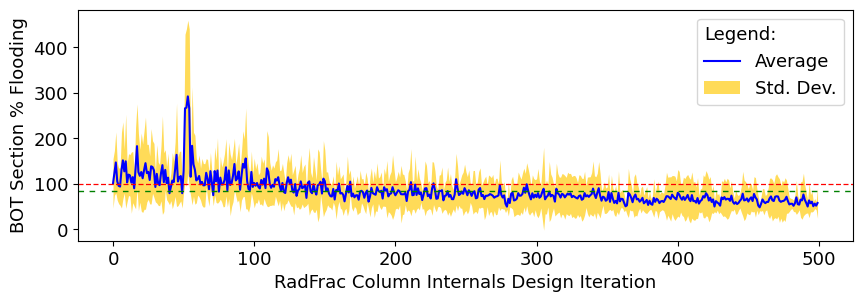

In [6]:
## BOT

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_states")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the State_TOP columns
df_all_wide2 = df_all_wide[['State_BOT']]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = ['State_BOT ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3


############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel('BOT Section % Flooding')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
ax.axhline(100, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.axhline(85, color="green", linewidth=1, dashes =  (4,4,4,4))
ax.legend(title='Legend:', alignment='left')
plt.savefig("AspenRL_plot1_results_StateBOT_Expt1.jpg", dpi=300, bbox_inches='tight')

### Actions

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
#import glob2

f = Path.cwd().joinpath("outputs_actions")
files = list(f.glob("*5_0.csv"))[0]

df1 = pd.read_csv(files)
#df1 = pd.read_csv(f)

def stripOutsideBracket(string):
    string = string[:-1]
    string = string[1:]    
    return string

def stripComma(string):
    string = string.lstrip(',') # strip leading comma
    string = string.rstrip(',') # strip last comma
    return string
    


# create function that splits the array of state values
def cleanCSV(df):

    # remove brackets and comma leading/trailing per entry 
    df1 = df['action'].apply(lambda x: stripOutsideBracket(x))
    df['action'] = df1.apply(lambda x: stripComma(x))
    
    # Convert String Lists to Actual Lists:
    df['action'] = df['action'].apply(eval)
    #Split the Lists into Separate Columns
    split_df = pd.DataFrame(df['action'].tolist(), index=df.index)
    split_df.columns = ['Action1_TOP','Action2_TOP','Action3_TOP','Action4_TOP','Action5_TOP',
                       'Action1_BOT','Action2_BOT','Action3_BOT','Action4_BOT','Action5_BOT', 'Action6']
    df = pd.concat([df,split_df], axis=1)
    df = df.drop('action', axis=1)
    return df

# try function
df_all = cleanCSV(df1)
df_all.head

<bound method NDFrame.head of      episode  Action1_TOP  Action2_TOP  Action3_TOP  Action4_TOP  Action5_TOP  \
0          0   127.374466     2.470717   113.810394    10.628639     0.908978   
1          1    63.458030     5.304575   127.028340    10.464071     0.325110   
2          2   116.573944     2.263329    71.660260     8.078110     0.826932   
3          3    96.364830     6.814092    71.446240    11.667612     0.920704   
4          4   145.142140     3.797758   109.463264    11.310102     0.647606   
..       ...          ...          ...          ...          ...          ...   
495      495    79.140710     6.596063    23.409927    11.806331     0.469698   
496      496    47.760574     4.416556    47.195187    11.384673     0.138954   
497      497   142.882870     6.611737   146.056720    10.627389     0.179537   
498      498    55.903587     6.675476    63.801575    13.810026     0.300478   
499      499   114.686750     6.222244   137.561830    14.793247     0.247158  

C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\4070713842.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


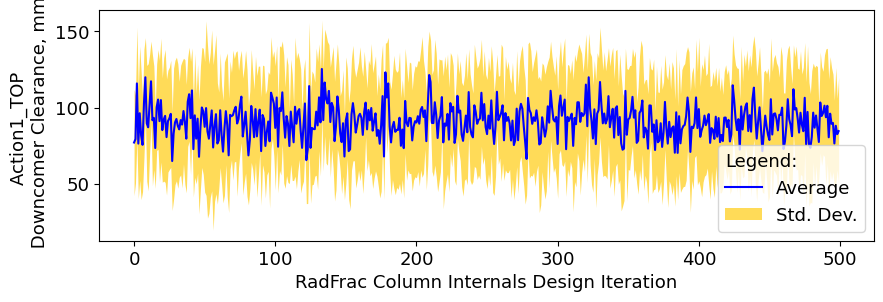

In [8]:
## TOP - Action 1: downcomer cleafrance, mm

action = "Action1_TOP"
action_description = "Downcomer Clearance, mm"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = ['Action1_TOP_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\1900538324.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


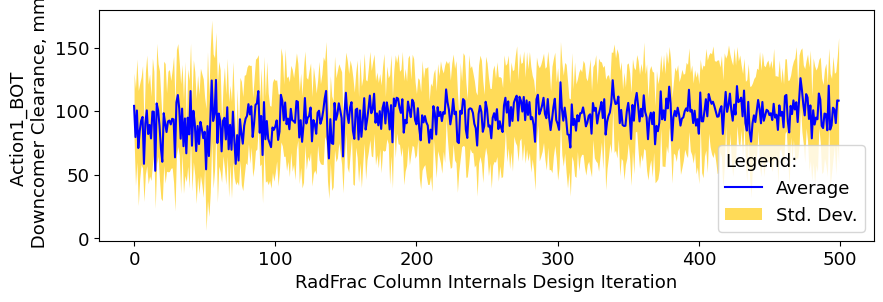

In [9]:
## BOT - Action 1: downcomer cleafrance, mm

action = "Action1_BOT"
action_description = "Downcomer Clearance, mm"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\1249592537.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


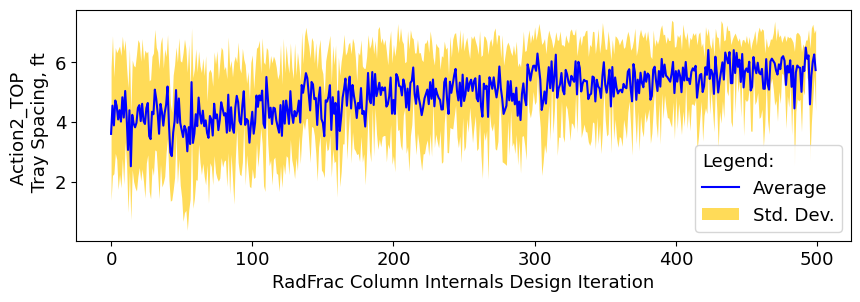

In [10]:
## TOP - Action 2: Tray Spacing, ft

action = "Action2_TOP"
action_description = "Tray Spacing, ft"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\1242829383.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


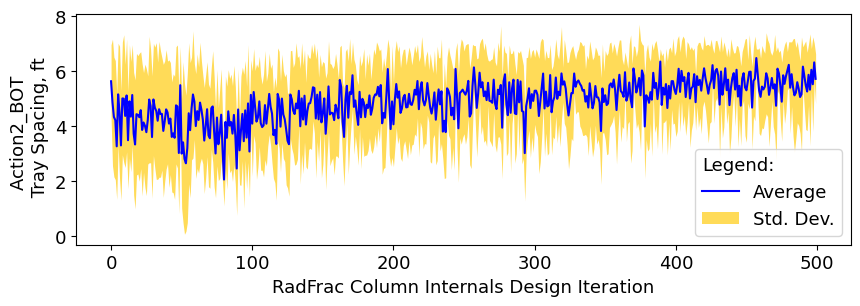

In [11]:
## BOT - Action 2: Tray Spacing, ft

action = "Action2_BOT"
action_description = "Tray Spacing, ft"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\276209248.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


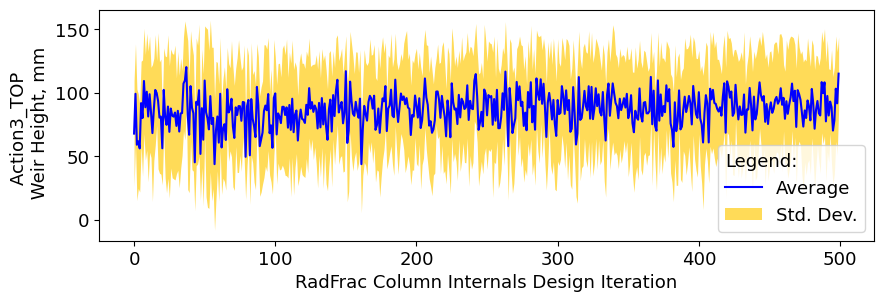

In [12]:
## TOP - Action 3: Weir Height, mm

action = "Action3_TOP"
action_description = "Weir Height, mm"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\2753617072.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


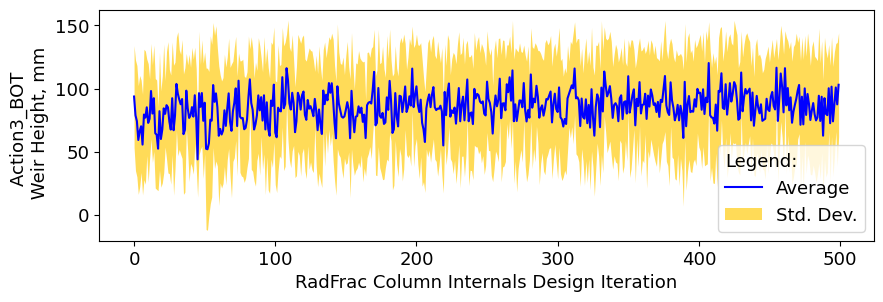

In [13]:
## BOT - Action 3: Weir Height, mm

action = "Action3_BOT"
action_description = "Weir Height, mm"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\3616973277.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


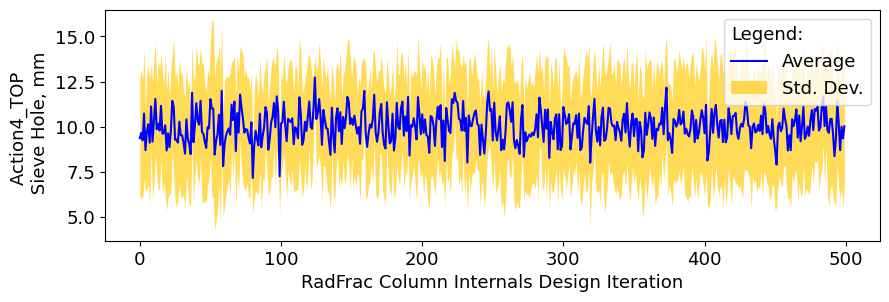

In [14]:
## TOP - Action 4: Sieve Hole, mm

action = "Action4_TOP"
action_description = "Sieve Hole, mm"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\402246468.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


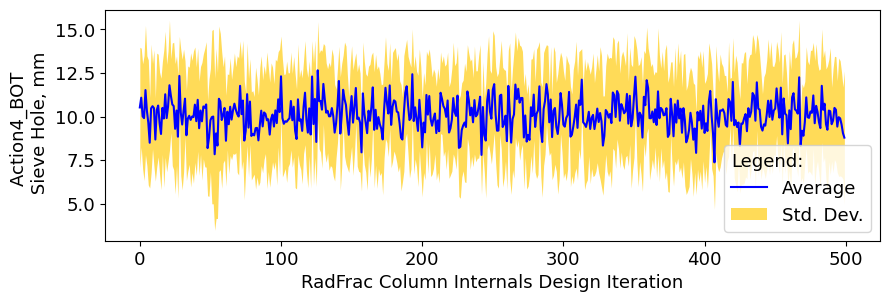

In [15]:
## BOT - Action 4: Sieve Hole, mm

action = "Action4_BOT"
action_description = "Sieve Hole, mm"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\2823098614.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


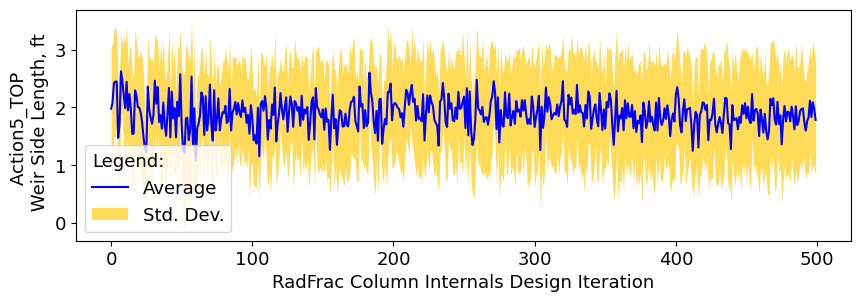

In [16]:
## TOP - Action 5: Weir Side Length, ft

action = "Action5_TOP"
action_description = "Weir Side Length, ft"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2 *= 3.2808399 # convert meter to feet

df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\3496385098.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


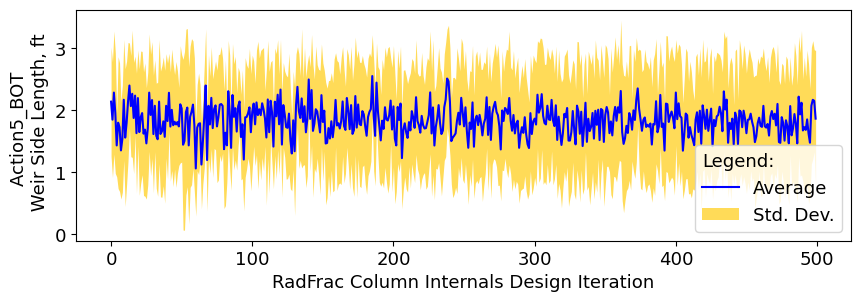

In [17]:
## BOT - Action 5: Weir Side Length, ft

action = "Action5_BOT"
action_description = "Weir Side Length, ft"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2 *= 3.2808399 # convert meter to feet

df_all_wide2.columns = [action+'_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(90, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(80, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


In [18]:
"""
## TOP - Action 6: column diameter, ft

action = "Action6"
action_description = "Column Diameter, ft"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2 *= 1 # factor if conversion is needed?

df_all_wide2.columns = [f'{action}_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color='#000080', label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF', linewidth=0)
ax.axhline(9, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.axhline(4, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')

"""

'\n## TOP - Action 6: column diameter, ft\n\naction = "Action6"\naction_description = "Column Diameter, ft"\n\n############---- PROCESS DATA ----############\nf = Path.cwd().joinpath("outputs_actions")\n\n# read data from CSV files\ndf_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)\n\n\n# keep only the \'action1_TOP\' columns\ndf_all_wide2 = df_all_wide[[action]]\ndf_all_wide2 = df_all_wide2.iloc[:nrows,]\n\n# assign unique column names\ndf_all_wide2 *= 1 # factor if conversion is needed?\n\ndf_all_wide2.columns = [f\'{action}_ \' + str(n) for n in range(nfiles)]\n# compute mean and STDEV\ndf_all_wide3 = df_all_wide2\ndf_all_wide3[\'average\'] = df_all_wide2.mean(axis=1)\ndf_all_wide3[\'standard_dev\'] = df_all_wide2.std(axis=1)\n#df_all_wide3\n\n############---- PLOTTING ----############\n# data\nx = df_all_wide3.index.values\ny = df_all_wide3.average.values\nerror = df_all_wide3.standard_dev.values\n\n# plot\nfig, ax = plt.subplots(figsize=(10, 

C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\2545161359.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


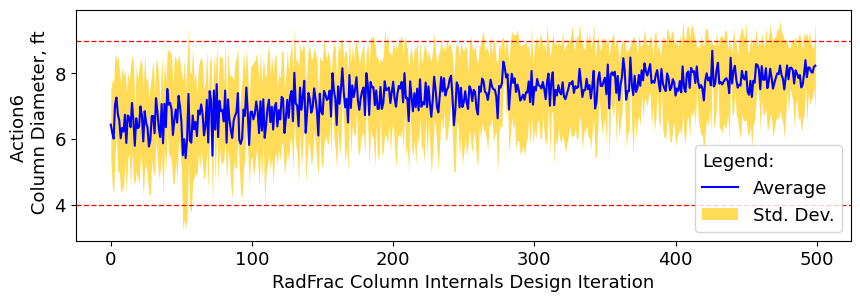

In [19]:

##For both TOP & BOT - Action 6: column diameter, ft

action = "Action6"
action_description = "Column Diameter, ft"

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_actions")

# read data from CSV files
df_all_wide = pd.concat([cleanCSV(pd.read_csv(csv)) for csv in f.glob("*.csv")], axis=1)


# keep only the 'action1_TOP' columns
df_all_wide2 = df_all_wide[[action]]
df_all_wide2 = df_all_wide2.iloc[:nrows,]

# assign unique column names
df_all_wide2 *= 1 # factor if conversion is needed?

df_all_wide2.columns = [f'{action}_ ' + str(n) for n in range(nfiles)]
# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3

############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel(f'{action} \n {action_description}')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
ax.axhline(9, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.axhline(4, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')
plt.savefig(f'AspenRL_plot1_results_{action}.jpg', dpi=300, bbox_inches='tight')


## Runtime

C:\Users\dhanf\AppData\Local\Temp\ipykernel_21272\843371680.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'k', color=color, label="Average")


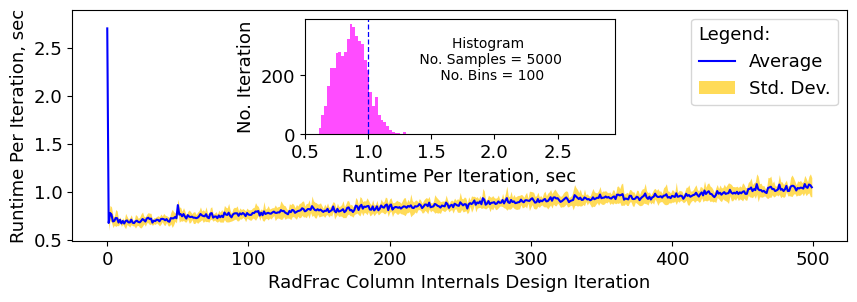

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
#import mpl_toolkits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

############---- PROCESS DATA ----############
f = Path.cwd().joinpath("outputs_runTime")
# read data from CSV files
df_all_wide = pd.concat([pd.read_csv(csv) for csv in f.glob("*.csv")], axis=1)

# Keep only the reward colimns 
df_all_wide2 = df_all_wide[['runTime_sec']]
df_all_wide2 = df_all_wide2.iloc[:nrows,]


# assign unique column names
column_names = ['runTime_ ' + str(n) for n in range(nfiles)]
df_all_wide2.columns = column_names
# reshape pandas from wide to long -> for the histogram
df_long = pd.lreshape(df_all_wide2.reset_index(), {'value': column_names}) 

# compute mean and STDEV
df_all_wide3 = df_all_wide2
df_all_wide3['average'] = df_all_wide2.mean(axis=1)
df_all_wide3['standard_dev'] = df_all_wide2.std(axis=1)
#df_all_wide3


############---- PLOTTING ----############
# data
x = df_all_wide3.index.values
y = df_all_wide3.average.values
error = df_all_wide3.standard_dev.values

# plot
fig, ax = plt.subplots(figsize=(10, 3))
#plt_1 = plt.figure(figsize=(10, 3))
ax.plot(x, y, 'k', color=color, label="Average")
ax.set_ylabel('Runtime Per Iteration, sec')
ax.set_xlabel('RadFrac Column Internals Design Iteration')
ax.fill_between(x, y-error, y+error, label="Std. Dev.",alpha=fill_alpha, edgecolor='#1B2ACC', facecolor=facecolor, linewidth=0)
#ax.axhline(100, color="red", linewidth=0.9, dashes =  (4,2,4,2))
#ax.axhline(0, color="red", linewidth=0.9, dashes =  (4,2,4,2))
ax.legend(title='Legend:', alignment='left')



# ADD inset graph: histogram of the runtime values
# create inset plot

df_all_long = df_all_wide2

sub_ax = inset_axes(
    ax,
    width="40%",
    height="50%",
    loc="upper center",
    #bbox_transform=ax.transAxes,
    borderpad=0.5  # padding between parent and inset axes
)

# add content inside inset plot
sub_ax.hist(
    df_long[['value']],
    bins=100,
    density=False,
    color='#FF00FF',
    alpha=0.7,

)

#plt.rcParams['font.size'] = 10
sub_ax.set_xlabel('Runtime Per Iteration, sec')
sub_ax.set_ylabel('No. Iteration')
sub_ax.set_title('Histogram \n No. Samples = 5000 \n No. Bins = 100', size=10, x=0.6, y=0.4)
sub_ax.axvline(1, color="blue", linewidth=0.9, dashes =  (4,2,4,2))

plt.savefig("AspenRL_plot1_results_RunTime1.jpg", dpi=300, bbox_inches='tight')

#print(f'rows: {len(df_all_wide)}')

In [21]:
len(df_long)

5000